In [130]:
from sympy import *

In [131]:
x, y, z = symbols('x y z', real=True)
xi = Matrix([x, y, z])
theta = Function('theta', real=True)(x, y, z)

In [132]:
n = Matrix([cos(theta), sin(theta), 0])

In [133]:
delta = eye(3)

In [184]:
def grad(f):
    return Matrix([f.diff(x), f.diff(y), f.diff(z)])

def div(f):
    return f[0].diff(x) + f[1].diff(y) + f[2].diff(z)

def curl(f):
    
    curl_f = Matrix([0, 0, 0])
    
    curl_f[0] = f[2].diff(y) - f[1].diff(z)
    curl_f[1] = f[0].diff(z) - f[2].diff(x)
    curl_f[2] = f[1].diff(x) - f[0].diff(y)
    
    return curl_f

def ip(g, f):
    
    return g[0]*f[0] + g[1]*f[1] + g[2]*f[2]

def square(f):
    
    return ip(f, f)

def cross(g, f):
    
    cross_g_f = Matrix([0, 0, 0])
    
    cross_g_f[0] = g[1]*f[2] - g[2]*f[1]
    cross_g_f[1] = g[2]*f[0] - g[0]*f[2]
    cross_g_f[2] = g[0]*f[1] - g[1]*f[0]
    
    return cross_g_f

In [135]:
S = div(n)
T = ip(n, curl(n))
B = cross(n, curl(n))

Delta = zeros(3)
for i in range(3):
    for j in range(3):
        Delta[i, j] = Rational(1, 2) * (n[j].diff(xi[i]) + n[i].diff(xi[j])
                                        + sum(-n[i]*n[k]*n[j].diff(xi[k])
                                              - n[j]*n[k]*n[i].diff(xi[k])
                                              - delta[i, j] * n[k].diff(xi[k])
                                              + n[i]*n[j]*n[k].diff(xi[k])
                                              for k in range(3))
                                       )

In [136]:
display(S)
display(T)
display(B)
display(Delta)

-sin(theta(x, y, z))*Derivative(theta(x, y, z), x) + cos(theta(x, y, z))*Derivative(theta(x, y, z), y)

-sin(theta(x, y, z))**2*Derivative(theta(x, y, z), z) - cos(theta(x, y, z))**2*Derivative(theta(x, y, z), z)

Matrix([
[ (sin(theta(x, y, z))*Derivative(theta(x, y, z), y) + cos(theta(x, y, z))*Derivative(theta(x, y, z), x))*sin(theta(x, y, z))],
[-(sin(theta(x, y, z))*Derivative(theta(x, y, z), y) + cos(theta(x, y, z))*Derivative(theta(x, y, z), x))*cos(theta(x, y, z))],
[                                                                                                                           0]])

Matrix([
[sin(theta(x, y, z))**2*cos(theta(x, y, z))*Derivative(theta(x, y, z), y) + sin(theta(x, y, z))*cos(theta(x, y, z))**2*Derivative(theta(x, y, z), x)/2 - sin(theta(x, y, z))*Derivative(theta(x, y, z), x)/2 + cos(theta(x, y, z))**3*Derivative(theta(x, y, z), y)/2 - cos(theta(x, y, z))*Derivative(theta(x, y, z), y)/2,                                                                                                 sin(theta(x, y, z))**3*Derivative(theta(x, y, z), y)/2 - sin(theta(x, y, z))*Derivative(theta(x, y, z), y)/2 - cos(theta(x, y, z))**3*Derivative(theta(x, y, z), x)/2 + cos(theta(x, y, z))*Derivative(theta(x, y, z), x)/2,                                                      -sin(theta(x, y, z))*Derivative(theta(x, y, z), z)/2],
[                                                                                               sin(theta(x, y, z))**3*Derivative(theta(x, y, z), y)/2 - sin(theta(x, y, z))*Derivative(theta(x, y, z), y)/2 - cos(theta(x, y, z))**3*Derivative(theta(x,

# Plotting twisted director

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [138]:
mpl.rcParams['figure.dpi'] = 300

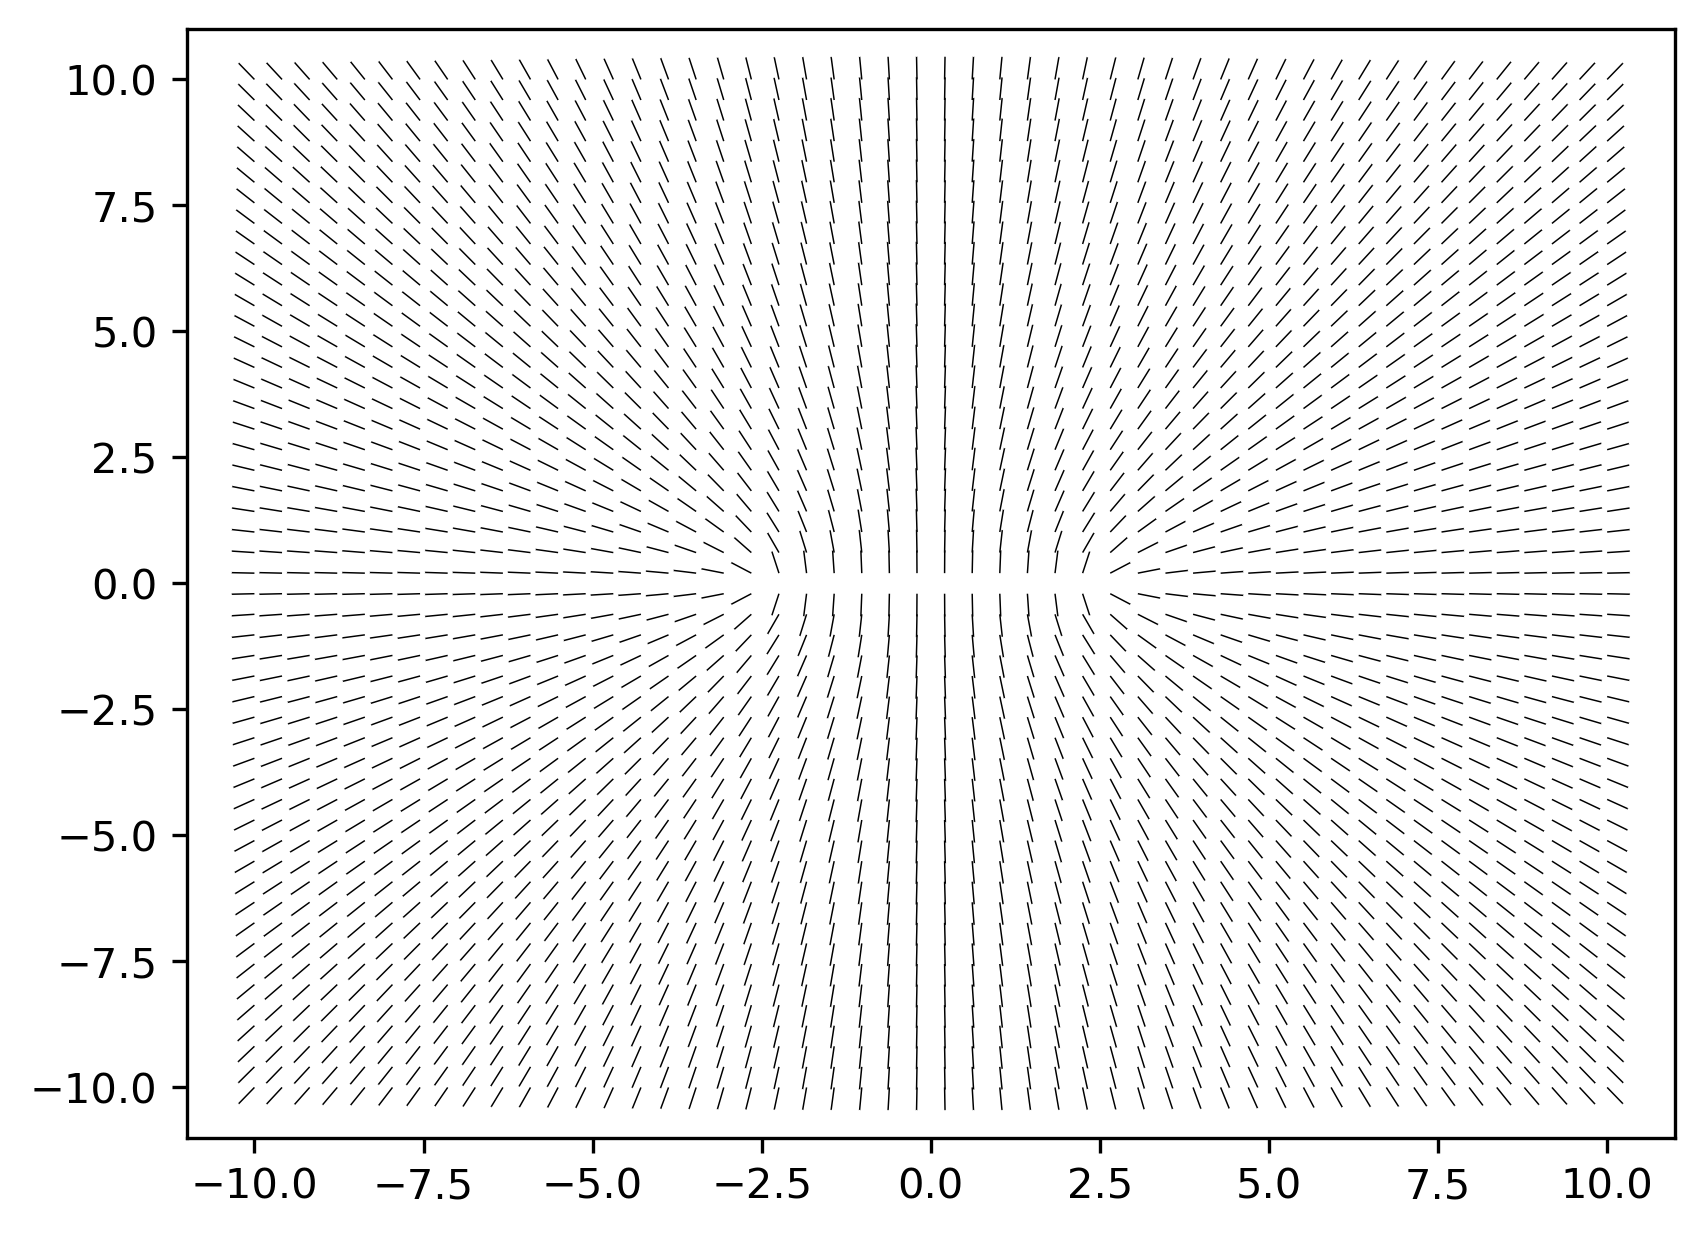

In [139]:
num = 50
d = 5
x = np.linspace(-10, 10, num)
y = np.linspace(-10, 10, num)

X, Y = np.meshgrid(x, y, indexing='ij')

Theta = (0.5 * np.arctan2(Y, X - d/2)
         + 0.5 * np.arctan2(Y, X + d/2))

U = np.cos(Theta)
V = np.sin(Theta)

plt.quiver(X, Y, U, V, scale=50.0, headwidth=0, width=0.001)
plt.show()

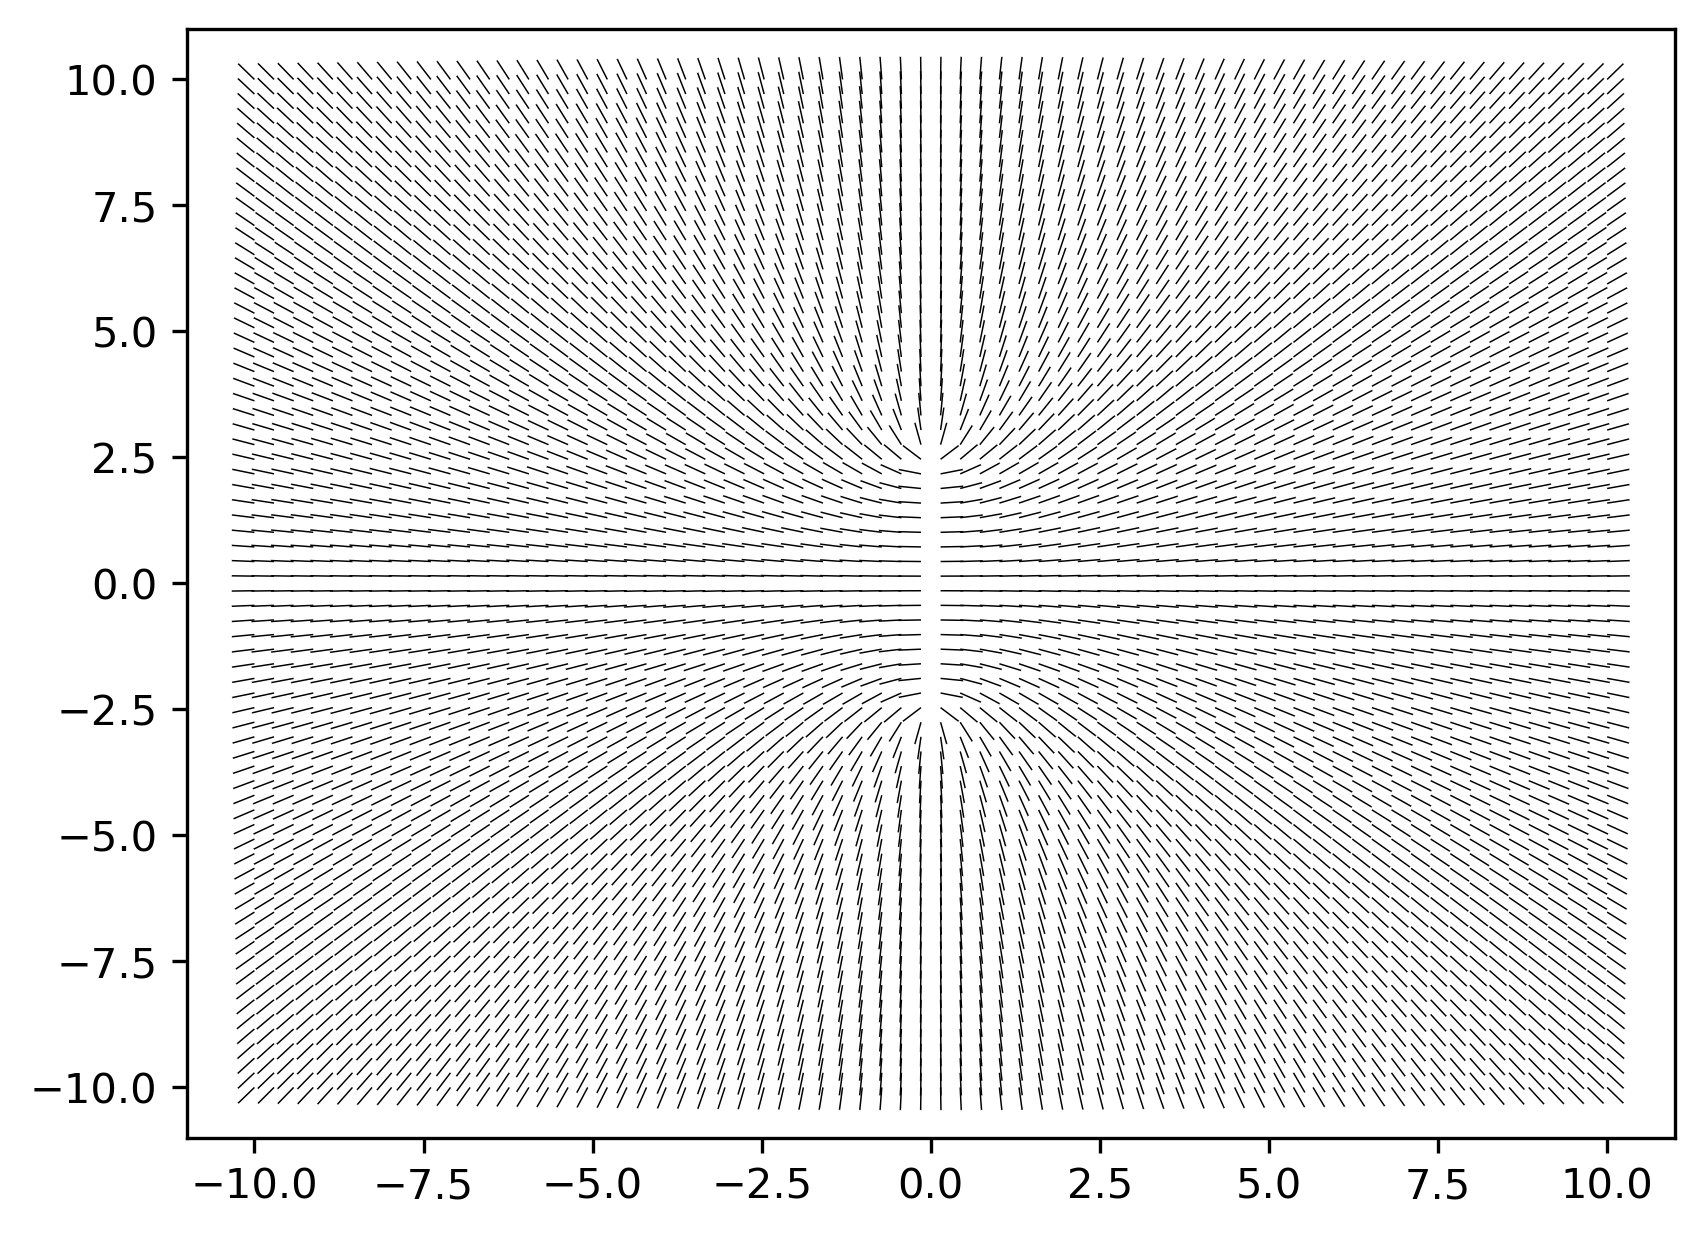

In [140]:
num = 70
d = 5
alpha = np.pi / 2
x = np.linspace(-10, 10, num)
y = np.linspace(-10, 10, num)

X, Y = np.meshgrid(x, y, indexing='ij')

Theta = (0.5 * np.arctan2(-np.sin(alpha) * X + np.cos(alpha) * Y, 
                          np.cos(alpha) * X + np.sin(alpha) * Y - d / 2)
         + 0.5 * np.arctan2(-np.sin(alpha) * X + np.cos(alpha) * Y, 
                            np.cos(alpha) * X + np.sin(alpha) * Y + d / 2)
         + alpha)

U = np.cos(Theta)
V = np.sin(Theta)

plt.quiver(X, Y, U, V, scale=50.0, headwidth=0, width=0.001)
plt.show()

# Elastic terms explicitly computed for twisted configuration

In [141]:
x, y, z = symbols('x y z', real=True)
xi = Matrix([x, y, z])
theta = Function('theta', real=True)(x, y, z)
alpha, d = symbols('alpha d', positive=True)

In [142]:
theta_p = (Rational(1, 2) * atan2(-sin(alpha * z) * x + cos(alpha * z) * y,
                                  cos(alpha * z) * x + sin(alpha * z) * y - d / 2)
          + Rational(1, 2) * atan2(-sin(alpha * z) * x + cos(alpha * z) * y,
                                   cos(alpha * z) * x + sin(alpha * z) * y + d / 2)
          + alpha * z)

display(theta_p)

alpha*z + atan2(-x*sin(alpha*z) + y*cos(alpha*z), -d/2 + x*cos(alpha*z) + y*sin(alpha*z))/2 + atan2(-x*sin(alpha*z) + y*cos(alpha*z), d/2 + x*cos(alpha*z) + y*sin(alpha*z))/2

In [143]:
S_p = simplify( S.subs(theta, theta_p).doit() )

In [144]:
display(S_p)

(-4*(d**2*x*sin(2*alpha*z) - d**2*y*cos(2*alpha*z) - 4*x**2*y - 4*y**3)*sin(alpha*z + atan2(-x*sin(alpha*z) + y*cos(alpha*z), -d/2 + x*cos(alpha*z) + y*sin(alpha*z))/2 + atan2(-x*sin(alpha*z) + y*cos(alpha*z), d/2 + x*cos(alpha*z) + y*sin(alpha*z))/2) + 4*(-d**2*x*cos(2*alpha*z) - d**2*y*sin(2*alpha*z) + 4*x**3 + 4*x*y**2)*cos(alpha*z + atan2(-x*sin(alpha*z) + y*cos(alpha*z), -d/2 + x*cos(alpha*z) + y*sin(alpha*z))/2 + atan2(-x*sin(alpha*z) + y*cos(alpha*z), d/2 + x*cos(alpha*z) + y*sin(alpha*z))/2))/((d**2 - 4*d*x*cos(alpha*z) - 4*d*y*sin(alpha*z) + 4*x**2 + 4*y**2)*(d**2 + 4*d*x*cos(alpha*z) + 4*d*y*sin(alpha*z) + 4*x**2 + 4*y**2))

In [145]:
T_p = simplify( T.subs(theta, theta_p).doit() )

In [146]:
display(T_p)

alpha*d**2*(-d**2 + 4*x**2*cos(2*alpha*z) + 8*x*y*sin(2*alpha*z) - 4*y**2*cos(2*alpha*z))/(d**4 - 8*d**2*x**2*cos(2*alpha*z) - 16*d**2*x*y*sin(2*alpha*z) + 8*d**2*y**2*cos(2*alpha*z) + 16*x**4 + 32*x**2*y**2 + 16*y**4)

In [147]:
B_p = simplify( B.subs(theta, theta_p).doit() )

In [148]:
display(B_p)

Matrix([
[4*((d**2*x*sin(2*alpha*z) - d**2*y*cos(2*alpha*z) - 4*x**2*y - 4*y**3)*cos(alpha*z + atan2(-x*sin(alpha*z) + y*cos(alpha*z), -d/2 + x*cos(alpha*z) + y*sin(alpha*z))/2 + atan2(-x*sin(alpha*z) + y*cos(alpha*z), d/2 + x*cos(alpha*z) + y*sin(alpha*z))/2) + (-d**2*x*cos(2*alpha*z) - d**2*y*sin(2*alpha*z) + 4*x**3 + 4*x*y**2)*sin(alpha*z + atan2(-x*sin(alpha*z) + y*cos(alpha*z), -d/2 + x*cos(alpha*z) + y*sin(alpha*z))/2 + atan2(-x*sin(alpha*z) + y*cos(alpha*z), d/2 + x*cos(alpha*z) + y*sin(alpha*z))/2))*sin(alpha*z + atan2(-x*sin(alpha*z) + y*cos(alpha*z), -d/2 + x*cos(alpha*z) + y*sin(alpha*z))/2 + atan2(-x*sin(alpha*z) + y*cos(alpha*z), d/2 + x*cos(alpha*z) + y*sin(alpha*z))/2)/((d**2 - 4*d*x*cos(alpha*z) - 4*d*y*sin(alpha*z) + 4*x**2 + 4*y**2)*(d**2 + 4*d*x*cos(alpha*z) + 4*d*y*sin(alpha*z) + 4*x**2 + 4*y**2))],
[4*((-d**2*x*sin(2*alpha*z) + d**2*y*cos(2*alpha*z) + 4*x**2*y + 4*y**3)*cos(alpha*z + atan2(-x*sin(alpha*z) + y*cos(alpha*z), -d/2 + x*cos(alpha*z) + y*sin(alpha*z))/2 

In [149]:
Delta_p = Delta.subs(theta, theta_p).doit()

In [150]:
display(Delta_p)

Matrix([
[((x*sin(alpha*z) - y*cos(alpha*z))*sin(alpha*z)/(2*((-x*sin(alpha*z) + y*cos(alpha*z))**2 + (d/2 + x*cos(alpha*z) + y*sin(alpha*z))**2)) + (x*sin(alpha*z) - y*cos(alpha*z))*sin(alpha*z)/(2*((-x*sin(alpha*z) + y*cos(alpha*z))**2 + (-d/2 + x*cos(alpha*z) + y*sin(alpha*z))**2)) + (d/2 + x*cos(alpha*z) + y*sin(alpha*z))*cos(alpha*z)/(2*((-x*sin(alpha*z) + y*cos(alpha*z))**2 + (d/2 + x*cos(alpha*z) + y*sin(alpha*z))**2)) + (-d/2 + x*cos(alpha*z) + y*sin(alpha*z))*cos(alpha*z)/(2*((-x*sin(alpha*z) + y*cos(alpha*z))**2 + (-d/2 + x*cos(alpha*z) + y*sin(alpha*z))**2)))*sin(alpha*z + atan2(-x*sin(alpha*z) + y*cos(alpha*z), -d/2 + x*cos(alpha*z) + y*sin(alpha*z))/2 + atan2(-x*sin(alpha*z) + y*cos(alpha*z), d/2 + x*cos(alpha*z) + y*sin(alpha*z))/2)**2*cos(alpha*z + atan2(-x*sin(alpha*z) + y*cos(alpha*z), -d/2 + x*cos(alpha*z) + y*sin(alpha*z))/2 + atan2(-x*sin(alpha*z) + y*cos(alpha*z), d/2 + x*cos(alpha*z) + y*sin(alpha*z))/2) + ((x*sin(alpha*z) - y*cos(alpha*z))*sin(alpha*z)/(2*((-x*si

## Only look at $z = 0$ plane (Free energy should be identical for other planes)

In [151]:
S_p_plane = simplify(S_p.subs(z, 0))
display(S_p_plane)

(4*x*(-d**2 + 4*x**2 + 4*y**2)*cos(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2) + 4*y*(d**2 + 4*x**2 + 4*y**2)*sin(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2))/((d**2 - 4*d*x + 4*x**2 + 4*y**2)*(d**2 + 4*d*x + 4*x**2 + 4*y**2))

In [152]:
T_p_plane = simplify(T_p.subs(z, 0))
display(T_p_plane)

alpha*d**2*(-d**2 + 4*x**2 - 4*y**2)/(d**4 - 8*d**2*x**2 + 8*d**2*y**2 + 16*x**4 + 32*x**2*y**2 + 16*y**4)

In [153]:
B_p_plane = simplify(B_p.subs(z, 0))
display(B_p_plane)

Matrix([
[ 4*(x*(-d**2 + 4*x**2 + 4*y**2)*sin(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2) - y*(d**2 + 4*x**2 + 4*y**2)*cos(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2))*sin(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2)/((d**2 - 4*d*x + 4*x**2 + 4*y**2)*(d**2 + 4*d*x + 4*x**2 + 4*y**2))],
[-4*(x*(-d**2 + 4*x**2 + 4*y**2)*sin(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2) - y*(d**2 + 4*x**2 + 4*y**2)*cos(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2))*cos(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2)/((d**2 - 4*d*x + 4*x**2 + 4*y**2)*(d**2 + 4*d*x + 4*x**2 + 4*y**2))],
[                                                                                                                                                                                                                                                                                0]])

In [154]:
Delta_p_plane = simplify(Delta_p.subs(z, 0))
display(Delta_p_plane)

Matrix([
[                                     2*(-d**2*x*cos(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2) + d**2*y*sin(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2) + 4*x**3*cos(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2) + 4*x**2*y*sin(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2) + 4*x*y**2*cos(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2) + 4*y**3*sin(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2))*sin(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2)**2/((4*y**2 + (d - 2*x)**2)*(4*y**2 + (d + 2*x)**2)), (y*(8*y**2 + (d - 2*x)**2 + (d + 2*x)**2)*cos(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2)**3 - y*(8*y**2 + (d - 2*x)**2 + (d + 2*x)**2)*cos(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2) + (-(d - 2*x)*(4*y**2 + (d + 2*x)**2) + (d + 2*x)*(4*y**2 + (d - 2*x)**2))*sin(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2)**3/2 + ((d - 2*x)*(4*y**2 + (d + 2*x)**2) - (d + 2*x)*(4*y**2 + (d - 2*x)**2))*sin(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2)/2)/((4*y**2 + (d - 2*x)**2)*(4*y**2 + (d + 2*x)**2)),               

## Square them

In [155]:
Delta_squared = sum(Delta_p_plane[i, j] * Delta_p_plane[i, j]
                    for i in range(3)
                    for j in range(3))
display(Delta_squared)

alpha**2*d**4*(-d**2 + 4*x**2 - 4*y**2)**2*sin(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2)**2/(2*(d**4 - 8*d**2*x**2 + 8*d**2*y**2 + 16*x**4 + 32*x**2*y**2 + 16*y**4)**2) + alpha**2*d**4*(d**2 - 4*x**2 + 4*y**2)**2*cos(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2)**2/(2*(d**4 - 8*d**2*x**2 + 8*d**2*y**2 + 16*x**4 + 32*x**2*y**2 + 16*y**4)**2) + (-y*(8*y**2 + (d - 2*x)**2 + (d + 2*x)**2)*sin(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2) + ((d - 2*x)*(4*y**2 + (d + 2*x)**2) - (d + 2*x)*(4*y**2 + (d - 2*x)**2))*cos(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2)/2)**2/((4*y**2 + (d - 2*x)**2)**2*(4*y**2 + (d + 2*x)**2)**2) + 2*(y*(8*y**2 + (d - 2*x)**2 + (d + 2*x)**2)*cos(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2)**3 - y*(8*y**2 + (d - 2*x)**2 + (d + 2*x)**2)*cos(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2) + (-(d - 2*x)*(4*y**2 + (d + 2*x)**2) + (d + 2*x)*(4*y**2 + (d - 2*x)**2))*sin(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2)**3/2 + ((d - 2*x)*(4*y**2 + (d + 2*x)**2) - (d + 2*x)*(4*y**2 + (d - 

In [156]:
T_p_plane_squared = simplify( T_p_plane * T_p_plane )
display(T_p_plane_squared)

alpha**2*d**4*(d**2 - 4*x**2 + 4*y**2)**2/(d**4 - 8*d**2*x**2 + 8*d**2*y**2 + 16*x**4 + 32*x**2*y**2 + 16*y**4)**2

In [157]:
S_p_plane_squared = simplify( S_p_plane * S_p_plane )
display(S_p_plane_squared)

16*(x*(-d**2 + 4*x**2 + 4*y**2)*cos(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2) + y*(d**2 + 4*x**2 + 4*y**2)*sin(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2))**2/((d**2 - 4*d*x + 4*x**2 + 4*y**2)**2*(d**2 + 4*d*x + 4*x**2 + 4*y**2)**2)

In [158]:
B_squared = simplify( sum(B_p_plane[i] * B_p_plane[i]
                              for i in range(3)) )
display(B_squared)

16*(x*(-d**2 + 4*x**2 + 4*y**2)*sin(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2) - y*(d**2 + 4*x**2 + 4*y**2)*cos(atan2(y, -d/2 + x)/2 + atan2(y, d/2 + x)/2))**2/((d**2 - 4*d*x + 4*x**2 + 4*y**2)**2*(d**2 + 4*d*x + 4*x**2 + 4*y**2)**2)

# Explicitly calculating simplified Euler-Lagrange

Here we try to write out the Euler-Lagrange equation in terms of $\theta(x, y)$.

In [188]:
xp = Function("x'")(x, y, z)
yp = Function("y'")(x, y, z)

theta = Function('theta')(x, y)
thetap = Function('theta')(xp, yp)

n = Matrix([cos(theta), sin(theta), 0])
np = Matrix([cos(thetap + alpha*z), sin(thetap + alpha*z), 0])

In [189]:
S = div(np)
T = ip(n, curl(np))
B = cross(n, curl(np))

display(S)
display(T)
display(B)

-(Derivative(theta(x'(x, y, z), y'(x, y, z)), x'(x, y, z))*Derivative(x'(x, y, z), x) + Derivative(theta(x'(x, y, z), y'(x, y, z)), y'(x, y, z))*Derivative(y'(x, y, z), x))*sin(alpha*z + theta(x'(x, y, z), y'(x, y, z))) + (Derivative(theta(x'(x, y, z), y'(x, y, z)), x'(x, y, z))*Derivative(x'(x, y, z), y) + Derivative(theta(x'(x, y, z), y'(x, y, z)), y'(x, y, z))*Derivative(y'(x, y, z), y))*cos(alpha*z + theta(x'(x, y, z), y'(x, y, z)))

-(alpha + Derivative(theta(x'(x, y, z), y'(x, y, z)), x'(x, y, z))*Derivative(x'(x, y, z), z) + Derivative(theta(x'(x, y, z), y'(x, y, z)), y'(x, y, z))*Derivative(y'(x, y, z), z))*sin(alpha*z + theta(x'(x, y, z), y'(x, y, z)))*sin(theta(x, y)) - (alpha + Derivative(theta(x'(x, y, z), y'(x, y, z)), x'(x, y, z))*Derivative(x'(x, y, z), z) + Derivative(theta(x'(x, y, z), y'(x, y, z)), y'(x, y, z))*Derivative(y'(x, y, z), z))*cos(alpha*z + theta(x'(x, y, z), y'(x, y, z)))*cos(theta(x, y))

Matrix([
[                                ((Derivative(theta(x'(x, y, z), y'(x, y, z)), x'(x, y, z))*Derivative(x'(x, y, z), x) + Derivative(theta(x'(x, y, z), y'(x, y, z)), y'(x, y, z))*Derivative(y'(x, y, z), x))*cos(alpha*z + theta(x'(x, y, z), y'(x, y, z))) + (Derivative(theta(x'(x, y, z), y'(x, y, z)), x'(x, y, z))*Derivative(x'(x, y, z), y) + Derivative(theta(x'(x, y, z), y'(x, y, z)), y'(x, y, z))*Derivative(y'(x, y, z), y))*sin(alpha*z + theta(x'(x, y, z), y'(x, y, z))))*sin(theta(x, y))],
[                               -((Derivative(theta(x'(x, y, z), y'(x, y, z)), x'(x, y, z))*Derivative(x'(x, y, z), x) + Derivative(theta(x'(x, y, z), y'(x, y, z)), y'(x, y, z))*Derivative(y'(x, y, z), x))*cos(alpha*z + theta(x'(x, y, z), y'(x, y, z))) + (Derivative(theta(x'(x, y, z), y'(x, y, z)), x'(x, y, z))*Derivative(x'(x, y, z), y) + Derivative(theta(x'(x, y, z), y'(x, y, z)), y'(x, y, z))*Derivative(y'(x, y, z), y))*sin(alpha*z + theta(x'(x, y, z), y'(x, y, z))))*cos(theta(x, y))],
[-(

In [190]:
splay_term = grad(S)

In [191]:
coord_subs = {xp: cos(alpha*z) * x + sin(alpha*z) * y,
              yp: -sin(alpha*z) * x + cos(alpha*z) * y}

In [192]:
splay_term_simple = splay_term.subs(coord_subs).doit().subs(z, 0)
display(splay_term_simple[0])

-sin(theta(x, y))*Subs(Derivative(theta(_xi, y), _xi), _xi, x)*Subs(Derivative(theta(x, _xi), _xi), _xi, y) - sin(theta(x, y))*Subs(Derivative(theta(_xi, y), (_xi, 2)), _xi, x) - cos(theta(x, y))*Subs(Derivative(theta(_xi, y), _xi), _xi, x)**2 + cos(theta(x, y))*Subs(Derivative(theta(_xi, _xi), _xi, _xi), (_xi, _xi), (x, y))

$-(\theta_x \theta_y + \theta_{xx}) \sin\theta + (\theta_{xy} - \theta_x^2) \cos\theta$

In [193]:
bend_term = curl(cross(B, np)) + cross(curl(np), B)

In [194]:
bend_term_simple = bend_term.subs(coord_subs).doit().subs(z, 0)

In [196]:
simplify(bend_term_simple[0])

alpha**2*(-x*Derivative(theta(x, y), y) + y*Derivative(theta(x, y), x) + 1)**2*cos(theta(x, y)) + (sin(theta(x, y))*Derivative(theta(x, y), y) + cos(theta(x, y))*Derivative(theta(x, y), x))**2*cos(theta(x, y)) - sin(theta(x, y))*Derivative(theta(x, y), x)*Derivative(theta(x, y), y) + sin(theta(x, y))*Derivative(theta(x, y), (y, 2)) + cos(theta(x, y))*Derivative(theta(x, y), y)**2 + cos(theta(x, y))*Derivative(theta(x, y), x, y)

### Checking some stuff

#### Checking Euler-Lagrange

In [197]:
S = div(n)
splay_term = grad(S)

In [198]:
simplify(splay_term)

Matrix([
[-sin(theta(x, y))*Derivative(theta(x, y), x)*Derivative(theta(x, y), y) - sin(theta(x, y))*Derivative(theta(x, y), (x, 2)) - cos(theta(x, y))*Derivative(theta(x, y), x)**2 + cos(theta(x, y))*Derivative(theta(x, y), x, y)],
[-sin(theta(x, y))*Derivative(theta(x, y), y)**2 - sin(theta(x, y))*Derivative(theta(x, y), x, y) - cos(theta(x, y))*Derivative(theta(x, y), x)*Derivative(theta(x, y), y) + cos(theta(x, y))*Derivative(theta(x, y), (y, 2))],
[                                                                                                                                                                                                                           0]])

In [199]:
B = cross(n, curl(n))
bend_term = curl(cross(B, n)) + cross(curl(n), B)

In [200]:
simplify(bend_term[0])

2*sin(theta(x, y))*cos(theta(x, y))**2*Derivative(theta(x, y), x)*Derivative(theta(x, y), y) - sin(theta(x, y))*Derivative(theta(x, y), x)*Derivative(theta(x, y), y) + sin(theta(x, y))*Derivative(theta(x, y), (y, 2)) + cos(theta(x, y))**3*Derivative(theta(x, y), x)**2 - cos(theta(x, y))**3*Derivative(theta(x, y), y)**2 + 2*cos(theta(x, y))*Derivative(theta(x, y), y)**2 + cos(theta(x, y))*Derivative(theta(x, y), x, y)

In [201]:
simplify(bend_term[0] - splay_term[0])

2*sin(theta(x, y))*cos(theta(x, y))**2*Derivative(theta(x, y), x)*Derivative(theta(x, y), y) + sin(theta(x, y))*Derivative(theta(x, y), (x, 2)) + sin(theta(x, y))*Derivative(theta(x, y), (y, 2)) + cos(theta(x, y))**3*Derivative(theta(x, y), x)**2 - cos(theta(x, y))**3*Derivative(theta(x, y), y)**2 + cos(theta(x, y))*Derivative(theta(x, y), x)**2 + 2*cos(theta(x, y))*Derivative(theta(x, y), y)**2

#### Checking Free energy

In [209]:
simplify(S**2) + simplify(ip(B, B))

(sin(theta(x, y))*Derivative(theta(x, y), x) - cos(theta(x, y))*Derivative(theta(x, y), y))**2 + (sin(theta(x, y))*Derivative(theta(x, y), y) + cos(theta(x, y))*Derivative(theta(x, y), x))**2